# Numerical Simulation of Heat Conduction

## Abstract

This lab examined the heat conduction of various systems by simulating their behavior with numerical methods and using Python to carry out the computations. I converted the Diffusion Equation, also known as the Heat Equation, which is a partial differential equation, into a difference equation which is an approximation. I used Python to handle the computations for the difference equation and thus observed a simulated solution to the original differential equation. The system behaviors that I observed were consistent with our physical understanding of heat conduction in homogeneous materials.

## Physical System and Model

We study two systems in this lab, a rectangular length of copper for the one dimensional case and a copper sphere for the three dimensional case.

### One Dimensional Case

The general form for the diffusion equation in a homogeneous medium is below, with $\alpha$ representing a thermal parameter unique to the material and $T$ representing the temperature:

\begin{align}
\alpha^{2}\nabla^{2}T = \partial T/\partial t
\end{align}

In one dimension, we can write:

\begin{align}
\alpha^{2}\partial^{2}T/\partial x^{2} = \partial T/\partial t
\end{align}

Now, we consider a solid of length $L$. This continuous solid can be surveyed at a regular interval of length $h$. In addition, we can quantize time $t$ at a timestep $\Delta t$. Now we can write:

\begin{align}
x = mh
\end{align}
\begin{align}
t = n\Delta t
\end{align}

And we can write temperature as a function of $m$ and $n$ as $T(m,n)$.

We first derive our difference equation by finding the slopes of $T(m,n)$:

\begin{align}
(slope)_{2} = [T(m+1,n) - T(m,n)]/h
\end{align}
\begin{align}
(slope)_{1} = [T(m,n) - T(m-1,n)]/h
\end{align}

Now, we can try to approximate the diffusion equation in a finite way and get our difference equation.

First,

\begin{align}
\partial^{2}T/\partial x^{2} = \partial (slope)/\partial x \cong [(slope)_{2} - (slope)_{1}]/h
\end{align}

Next,

\begin{align}
\partial^{2}T/\partial x^{2}\cong [T(m+1,n)+T(m-1,n)-2T(m,n)]/h^{2}
\end{align}

Also,

\begin{align}
\partial T/\partial x\cong [T(m,n+1)-T(m,n)]/\Delta t
\end{align}

Finally, we can substitute into the original diffusion equation and get our difference equation:

\begin{align}
T(m,n+1) = T(m,n) + \beta * [T(m+1,n)+T(m-1,n)-2T(m,n)]
\end{align}

Where $\beta = \Delta t \alpha^{2}/h^{2}$ and is a parameter that relates to the error of the approximation. A derivation can be found in Kobiske, Hock but for our purposes, $\beta \leq 1/2$ insures the stablity and convergence of our model.

### Three Dimensional Case

The derivation of the difference equation for the three dimensional case follows from the one dimensional case. For a sphere, we state:

\begin{align}
\alpha^{2}[\partial^{2}T/\partial r^{2}+(2/r)(\partial T/\partial r)] = \partial T/\partial t
\end{align}

Now we apply the following transformation:

\begin{align}
T(r,t) = V(r,t)/r
\end{align}

After transformation, $T(r,t)$ can be seen is a solution of the same form as the one dimensional case. Thus,:

\begin{align}
V(m,n+1) = V(m,n) + \beta * [V(m+1,n)+V(m-1,n)-2V(m,n)]
\end{align}

### Comments

For our model, we require that initially the temperature distribution is known for all positions at $t=0$ and also all times at $x = 0$ and $x = L$. Examining the derived difference equation, this is because data regarding the time evolution of the temperature in the material is calculated from a past state.

For the case of the sphere, the temperature distribution must be known at $t=0$ and for all times at $x=r$. Kobiske, Hock recommends a "three point interpolation scheme" to find the temperature at the core of the sphere if it is not given. This procedure is given as:

\begin{align}
T(0,t) = 3T(1,t)-3T(2,t)+T(3,t)
\end{align}

## Algorithms

Using the difference formula detailed above, we can simulate the heat conduction of our chosen systems. The pseudocode representation of our procedure can be seen below. 

### Pseudocode of Heat Conduction Simulation

In [ ]:
# define constants being used in simulation
#
# initialize an array "lengths" of points in the material being observed
# initialize an array "times" of times that we will record data for
# initialize an array "temps" that will hold the temperatures of the material at different times
#
# for all times:
## if the time is 0:
### set the temperature data to the given initial condition
## else, for all other times:
### for all the lengths:
#### if the length is 0 or L:
##### use the given initial condition
#### else:
##### calculate the temperature using the difference equation and save it to the "temps" array

In this way, using the initial conditions, we will be able to calculate the temperature distribution of the entire material for any required time duration.

## Code

### One Dimensional Case

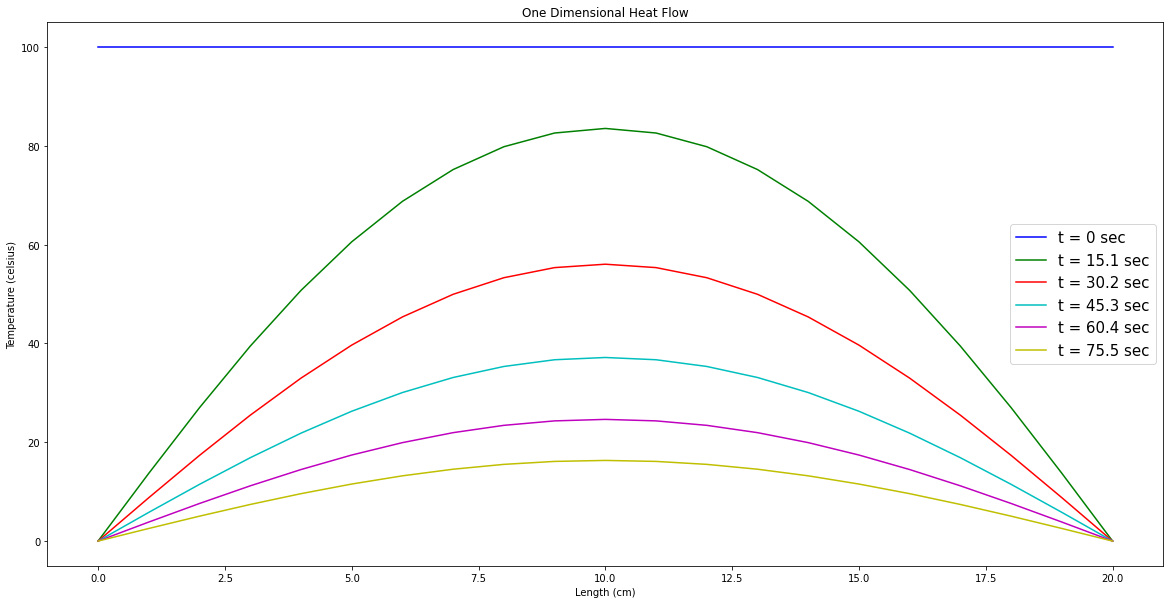

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

alpha_squared = 1.10407
h = 1
beta = 1/6
delta_t = beta*(h**2)/alpha_squared

total_timesteps = 500

L = 20

initial_temp = 100 #intial temperature at all positions
edge_temp = 0 #temp for all time at x = 0 and x = L

lengths = np.linspace(0,L,num = int(L/h)+1)
times = np.linspace(0,total_timesteps*delta_t,num = total_timesteps+1)
temps = np.zeros((len(times),len(lengths)))

for t in range(len(times)):
    if t == 0:
        temps[t,:] = initial_temp
    else:
        for x in range(len(lengths)):
            if x == 0 or x == L:
                temps[t,x] = edge_temp
            else:
                temps[t,x] = temps[t-1,x] + beta*(temps[t-1,x+1]+temps[t-1,x-1]-2*temps[t-1,x])

#print(temps)

plt.figure(figsize=(20,10))
plt.plot(lengths,temps[0],'b',label = 't = 0 sec')
plt.plot(lengths,temps[100],'g',label = 't = 15.1 sec')
plt.plot(lengths,temps[200],'r',label = 't = 30.2 sec')
plt.plot(lengths,temps[300],'c',label = 't = 45.3 sec')
plt.plot(lengths,temps[400],'m',label = 't = 60.4 sec')
plt.plot(lengths,temps[500],'y',label = 't = 75.5 sec')
plt.title('One Dimensional Heat Flow')
plt.xlabel('Length (cm)')
plt.ylabel('Temperature (celsius)')
plt.legend(loc='best', fontsize=15)
plt.show()

Figure 1. Temperature distributions in a rectangular copper bar

### Three Dimensional Case

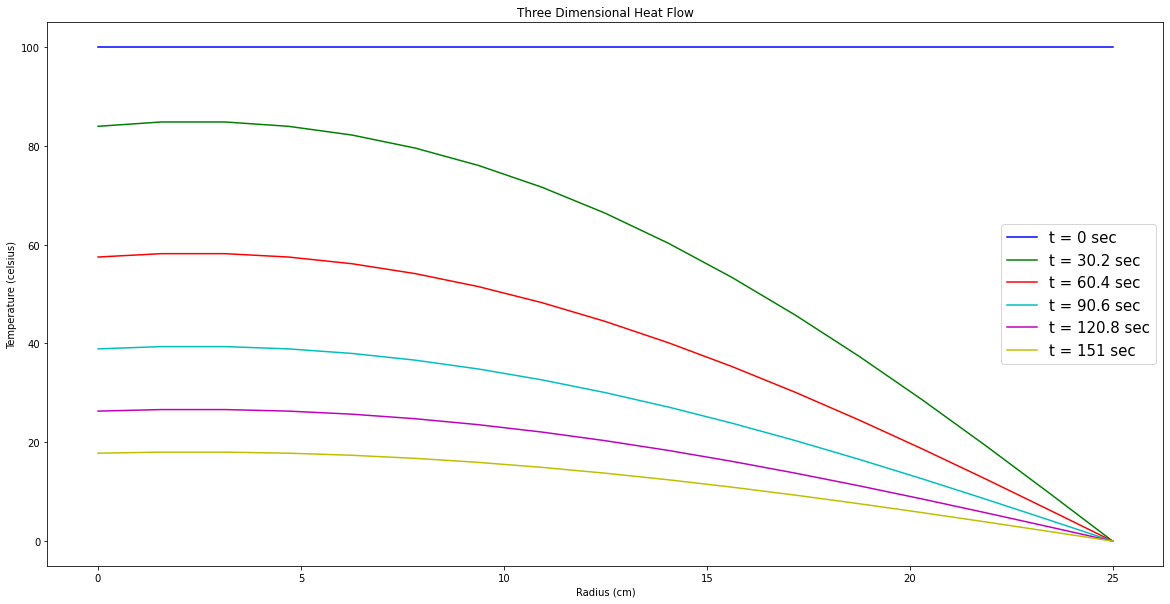

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

delta_t = 0.150956

total_timesteps = 1000

h = 1.5
L = 25

initial_temp = 100 #intial temperature at all positions
edge_temp = 0 #temp for all time x = L

radii = np.linspace(0,L,num = int(L/h)+1)
times = np.linspace(0,total_timesteps*delta_t,num = total_timesteps+1)
temps = np.zeros((len(times),len(radii)))

for t in range(len(times)):
    if t == 0:
        temps[t,:] = initial_temp
    else:
        for x in range(len(radii)-1,-1,-1):
            if x == len(radii)-1:
                temps[t,x] = edge_temp
            elif x == 0:
                #temps[t,x] = temps[t-1,x] + beta*(temps[t-1,x+1]+temps[t-1,x+1]-2*temps[t-1,x])
                temps[t,x] = 3*temps[t,1] - 3*temps[t,2] + temps[t,3]
            else:
                temps[t,x] = temps[t-1,x] + (1/6)*(temps[t-1,x+1]+temps[t-1,x-1]-2*temps[t-1,x])

plt.figure(figsize=(20,10))
plt.plot(radii,temps[0],'b',label = 't = 0 sec')
plt.plot(radii,temps[200],'g',label = 't = 30.2 sec')
plt.plot(radii,temps[400],'r',label = 't = 60.4 sec')
plt.plot(radii,temps[600],'c',label = 't = 90.6 sec')
plt.plot(radii,temps[800],'m',label = 't = 120.8 sec')
plt.plot(radii,temps[1000],'y',label = 't = 151 sec')
plt.title('Three Dimensional Heat Flow')
plt.xlabel('Radius (cm)')
plt.ylabel('Temperature (celsius)')
plt.legend(loc='best', fontsize=15)
plt.show()

Figure 2. Temperature distributions in a copper sphere

### One Dimensional Case, Different Temperature Ends

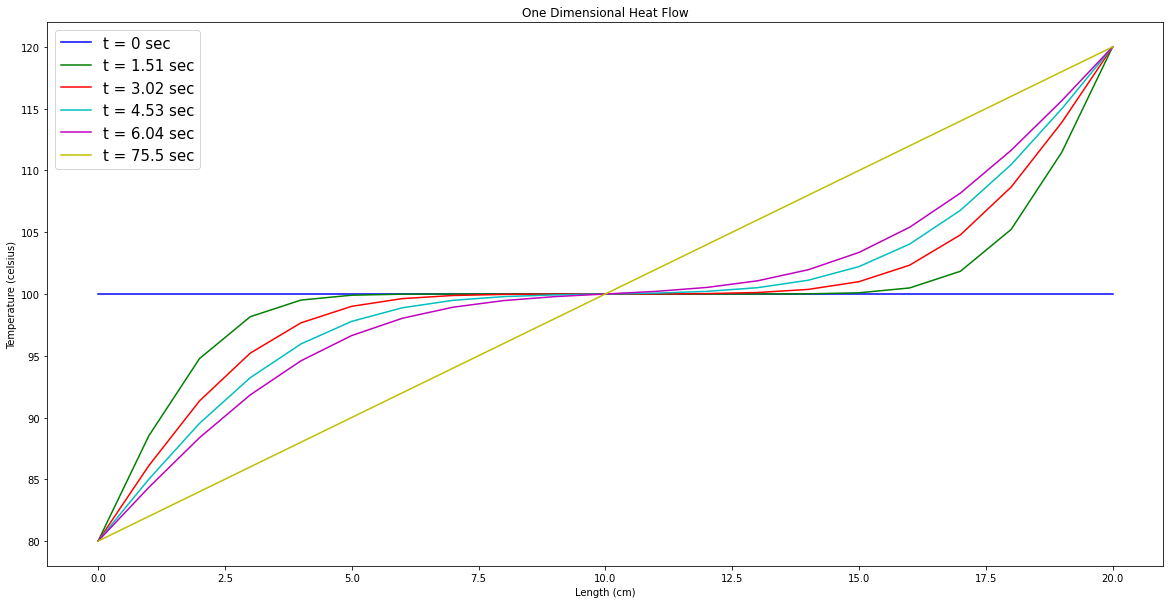

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

alpha_squared = 1.10407
h = 1
beta = 1/6
delta_t = beta*(h**2)/alpha_squared

total_timesteps = 500

L = 20

initial_temp = 100 #intial temperature at all positions
left_edge_temp = 80 #temp for all time at x = 0
right_edge_temp = 120

lengths = np.linspace(0,L,num = int(L/h)+1)
times = np.linspace(0,total_timesteps*delta_t,num = total_timesteps+1)
temps = np.zeros((len(times),len(lengths)))

for t in range(len(times)):
    if t == 0:
        temps[t,:] = initial_temp
    else:
        for x in range(len(lengths)):
            if x == 0:
                temps[t,x] = left_edge_temp
            elif x == L:
                temps[t,x] = right_edge_temp
            else:
                temps[t,x] = temps[t-1,x] + beta*(temps[t-1,x+1]+temps[t-1,x-1]-2*temps[t-1,x])

#print(temps)

plt.figure(figsize=(20,10))
plt.plot(lengths,temps[0],'b',label = 't = 0 sec')
plt.plot(lengths,temps[10],'g',label = 't = 1.51 sec')
plt.plot(lengths,temps[20],'r',label = 't = 3.02 sec')
plt.plot(lengths,temps[30],'c',label = 't = 4.53 sec')
plt.plot(lengths,temps[40],'m',label = 't = 6.04 sec')
plt.plot(lengths,temps[500],'y',label = 't = 75.5 sec')
plt.title('One Dimensional Heat Flow')
plt.xlabel('Length (cm)')
plt.ylabel('Temperature (celsius)')
plt.legend(loc='best', fontsize=15)
plt.show()

Figure 3. Temperature distributions in a rectangular copper bar with ends at different temperatures

## Results

Our simulation was able to successfully model the diffusion equation, and thus the heat flow in our chosen systems. Graphs of the simulation data can be seen above in the Code section.

### One Dimensional Simulation

The one dimensional simulation seems accurate because it describes the behavior we would expect from a initially hot copper bar that is then held at both ends at a constant temperature. We see that the bar is the warmest in the middle and the temperature decreases towards the end. We also see that the heat flow is greater when there is more heat. Each line in the graph is spaced at a constant time interval, and we see that the hotter the bar is, the faster it cools until the cooling slows down as it approaches the temperature of the ends.

### Three Dimensional Simulation

The three dimensional solution seems accurate because it also seems to describe the behavior we would expect. For a sphere initially at a given hot temperature and the placed into a newer, cold temperature, we see that the core is the hottest and the temperature decreases as we approach the surface of the sphere.

### One Dimensional Case, Different Temperature Ends

We see an interesting result in the graph of this case. We know in the original one dimensional case, the entire bar will eventually reach a temperature that matches the ends. It stands that in the case of mismatched end temperatures, after a long time, the bar will increase in temperature linearly across the bar as to connect the two end temperatures. It is interesting the heat flow of the end parts compared to the middle part that sort of "retains" its temperature for a short while.

## References

This lab was modeled after the discussion of Heat Flow Problems discussed in Kobiske and Hock's work. The BibTex citation can be found below.

@article{doi:10.1119/1.1987281,

author = {Kobiske,Ronald A.  and Hock,Jeffrey L. },

title = {Numerical Solution to Transient Heat Flow Problems},

journal = {American Journal of Physics},

volume = {41},

number = {4},

pages = {517-525},

year = {1973},

doi = {10.1119/1.1987281},


URL = { 
        https://doi.org/10.1119/1.1987281
    
},
eprint = { 
        https://doi.org/10.1119/1.1987281
    
}

}

End of Notebook